In [1]:
%load_ext autoreload
%autoreload 2

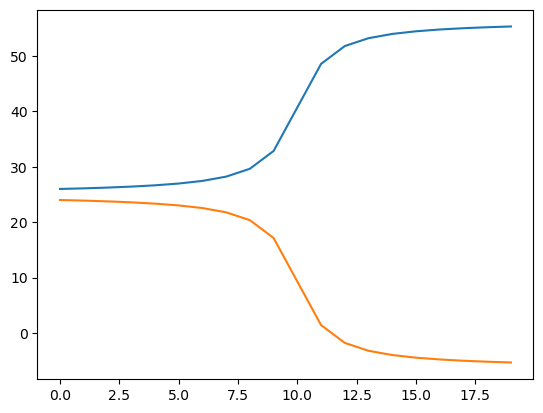

In [12]:
import numpy as np
import matplotlib.pyplot as plt
shape = [20, 2, 50, 50]
img = np.zeros(shape)
p1 = [shape[2]/2, shape[3]/2+10*(np.pi/2+np.arctan(t-shape[0]/2))]
p2 = [shape[2]/2, shape[3]/2-10*(np.pi/2+np.arctan(t-shape[0]/2))]
plt.plot(p1[1])
plt.plot(p2[1])

img[p1]

/media/cephfs2/jparham/Joe for Jerome /SegA Live imaging /20240229_delSegA/CroppedDivisions/01a_delSegA_CM_SyS_reg_Cell_0.tif


Text(0.5, 1.0, '01a_delSegA_CM_SyS_reg_Cell_0')

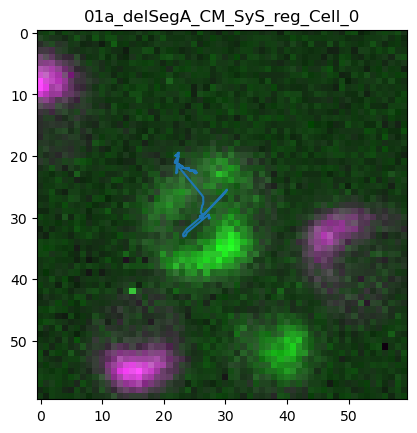

In [4]:
from pathlib import Path
import tifffile
import dnasufo as mq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# list files from the src folder
src = Path('/media/cephfs2/jparham/Joe for Jerome /')
filelist = pd.read_csv('filelist.csv')
#src = Path('/media/cephfs2/jparham/For Jerome/Divisions with G2toConstriction/')
dst = Path('./')

# filelist = pd.DataFrame.from_records(
#     [{'path':f,'name':f.stem} for f in src.glob('[!.]*.tif')]
# )
# filelist.head()
filename = filelist['path'].iloc[0]
print(filename)
img, cell_mask, cell_trj, diff, flow, rho, div, blob_labels, blobs_trj = mq.process(Path(filename))
plt.imshow(mq.uv2rgb(img[0]))
plt.plot(cell_trj['centroid-1'], cell_trj['centroid-0'])
plt.title(Path(filename).stem)

In [3]:
results_path = Path('tmp.h5')
if results_path.exists():
    results_path.unlink()
mq.save_result(results_path, Path(filename).stem, img, cell_mask, cell_trj, diff, flow, rho, div, blob_labels, blobs_trj)

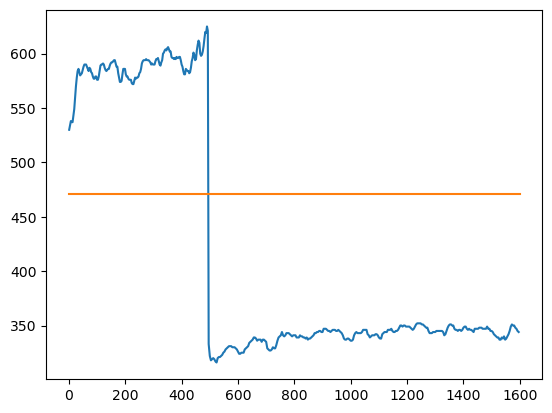

In [2]:
y=cell_trj['area']
y < y.mean()
plt.plot(y)
a=(np.max(y) + np.min(y))/2
plt.plot([0,1600],[a,a])


NameError: name 'x' is not defined

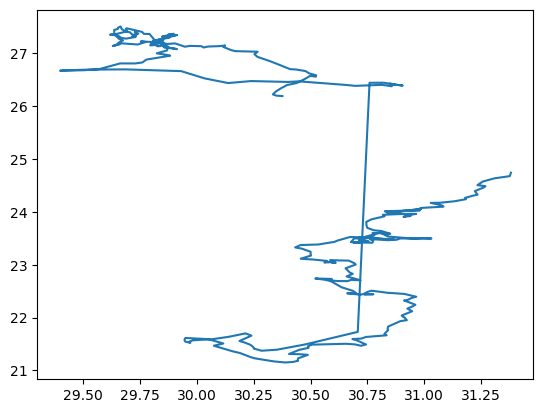

In [4]:
x1 = cell_trj['centroid-0']
y1 = cell_trj['centroid-1']
plt.plot(x1,y1)
plt.plot(x,y)
#plt.imshow(cell_trj['centroid-0'],cell_trj['centroid-1'])

In [ ]:
filelist[filelist['name'] == '01a_DSM639_SyS_CM_Cell_9.tif']

In [ ]:
for t in range(0,300,50):
    plt.imshow(30*labels[t,0] + img[t,0])
    plt.show()


In [ ]:
cell_trj.columns

In [ ]:
# plt.plot(cell_trj['moments_weighted_hu-6'])
plt.plot(cell_trj['mean_intensity'])


Motion analysis

In [7]:
diff = mq.frame_differences(pimg[:,1])
flow = mq.compute_flow(pimg[:,1],2)
rho = mq.momentum(pimg[:-1,1], flow)
div = mq.divergence(rho)
print(diff.shape, flow.shape, rho.shape, div.shape)


(440, 1, 60, 60) (440, 2, 60, 60) (440, 2, 60, 60) (440, 1, 60, 60)


In [38]:
flow_cell = mq.compute_flow(pimg[:,0], 10)

In [ ]:
t = 200
plt.subplot(141)
plt.imshow(np.stack((pimg[t,1],pimg[t,0]/2,pimg[t,1]),2)/50)
plt.axis('off')
plt.subplot(142)
plt.imshow(mq.uv2rgb((flow[t])))
plt.quiver(flow[t,1],flow[t,0])
plt.axis('off')
plt.title('DNA motion')
plt.subplot(143)
plt.imshow(mq.uv2rgb((flow_cell[t])))
plt.quiver(flow_cell[t,1],flow_cell[t,0])
plt.axis('off')
plt.title('Cell motion')
plt.subplot(144)
plt.imshow(mq.uv2rgb((flow[t]-flow_cell[t])))
plt.quiver(flow[t,1]-flow_cell[t,1],flow[t,0]-flow_cell[t,0])
plt.axis('off')
plt.title('DNA - cell motion')

In [ ]:
plt.plot([(np.linalg.norm(x, axis=0) * w).sum() / w.sum() for x,w in zip(flow, cell_mask)])
plt.plot([(np.linalg.norm(x, axis=0) * w).sum() / w.sum() for x,w in zip(flow_cell, cell_mask)])
plt.plot([(np.linalg.norm(x, axis=0) * w).sum() / w.sum() for x,w in zip(flow - flow_cell, cell_mask)])

In [11]:
from skimage import segmentation
from scipy import ndimage as ndi

segmentation.watershed(pimg[0,1], ndi.label(pimg[0,1]>120)[0] )

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

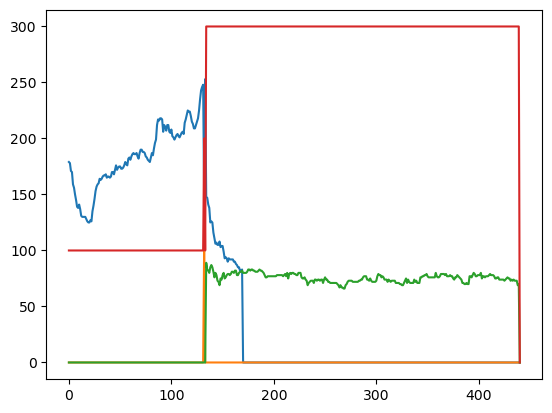

In [13]:
blob_labels, blob_trj = mq.segment_and_track_dna_blobs(pimg[:,1], cell_mask)
import numpy as np
for k in range(1,1+int(blob_labels.max())):
    y = (blob_labels==k).sum(axis=(1,2))
    plt.plot(y)
plt.plot(100*np.max(blob_labels,axis=(-1,-2)))

In [ ]:
blob_trj

In [ ]:
plt.plot(blob_trj['asymmetry'])

In [ ]:
k = 130
plt.subplot(121)
plt.imshow(pimg[k,1])
plt.subplot(122)
plt.imshow(blob_labels[k])
# from scipy import ndimage as ndi
# plt.imshow(ndi.gaussian_filter(ndi.distance_transform_edt(blob_labels[115]),2))
# d = ndi.gaussian_filter(ndi.distance_transform_edt(blob_labels[115]),2)
# plt.imshow(d==ndi.maximum_filter(d,5))

In [ ]:
blob_labels.max()

In [ ]:
mq.save_result("tmp.h5","tmp",img,cell_mask,cell_trj,diff,flow,rho,div,blob_labels,blob_trj)

In [ ]:
pd.read_hdf("tmp.h5","tmp/")

In [ ]:
mq.inspect_result("tmp.h5")

In [ ]:
img, cell_mask, cell_trj, diff, flow, rho, div, blob_labels, blob_trj = mq.load_result("tmp.h5","tmp")

In [ ]:
df = mq.record(filename, img, cell_mask, cell_trj, diff, flow, rho, div, blob_labels, blob_trj)

In [ ]:
df

In [ ]:
plt.imshow(diff[10,0]*cell_mask[10,0])

In [ ]:
plt.imshow(blob_labels[200]==1)

In [ ]:
plt.plot(df["frame"],df["dna blob 1 sum intensity"])

In [ ]:
blob_trj['particle'].unique()

In [ ]:
count, area, asymmetry_area, intensity, asymmetry_int, tmp = mq.blob_area_num_asymmetry(pimg[:,1], mask)

fig,ax = plt.subplots(5,1)
ax[0].plot(count)
ax[1].plot(area)
ax[2].plot(asymmetry_area)
ax[3].plot(intensity)
ax[4].plot(asymmetry_int)

In [ ]:
t = 100
plt.imshow(mask[t,0]+2*tmp[t] + pimg[t,1])

In [ ]:
import matplotlib.pyplot as plt
from skimage import measure

plt.imshow(mq.uv2rgb(img[300]))
for c in measure.find_contours(mask[0, 0], 0.5):
        plt.plot(c[:, 1], c[:, 0], "w")
plt.plot(position[2:,1], position[2:,0])

In [ ]:
fig, ax = plt.subplots(1,6, figsize=(15,5))
mq.figure(ax,"vv",img, mask, position, speed, diff, flow, rho, div)

In [ ]:
mq.strip(filename.stem, img, mask, position, speed, diff, flow, rho, div, "Greys", step=20, quiver=False)
plt.savefig('tmp.pdf')

In [ ]:
import napari
v = napari.view_image(img,channel_axis=1)
v.add_labels(mask.squeeze())
v.add_points(position,ndim=2)

In [ ]:
import colorsys
print(flow.max())

def vec2rgb(x):
    h = (np.arctan2(x[0],x[1])+3.1415) / (2*3.1415)
    v = np.linalg.norm(x,axis=0)    
    y = np.stack((h,v),-1).reshape(x.shape[1]*x.shape[2],2)         
    return np.stack([colorsys.hsv_to_rgb(hv[0],hv[1],1) for hv in y],0).reshape([x.shape[1],x.shape[2],3])

x,y = np.meshgrid(np.linspace(-1,1),np.linspace(-1,1))
plt.imshow(vec2rgb(np.stack((x,y))))
#plt.imshow(vec2rgb(flow[100]))
